In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
#load the dataset
sale=pd.read_csv('/content/Advertising.csv')

In [ ]:
#print first five entries
sale.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# checking the number of rows and columns
sale.shape

(200, 5)

In [ ]:
#print information about dataset
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
#check for null values
sale.isnull().values.any()

False

In [ ]:
# checking the number of missing values
sale.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
sale.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


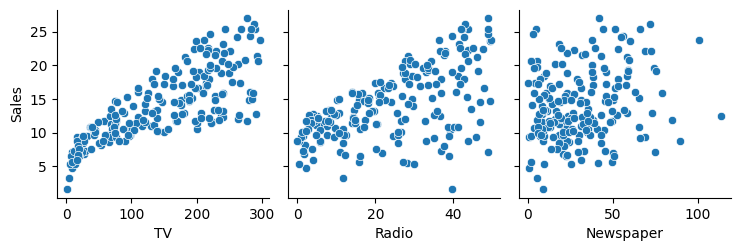

In [ ]:
sns.pairplot(sale,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

Text(0.5, 0, 'Tv')

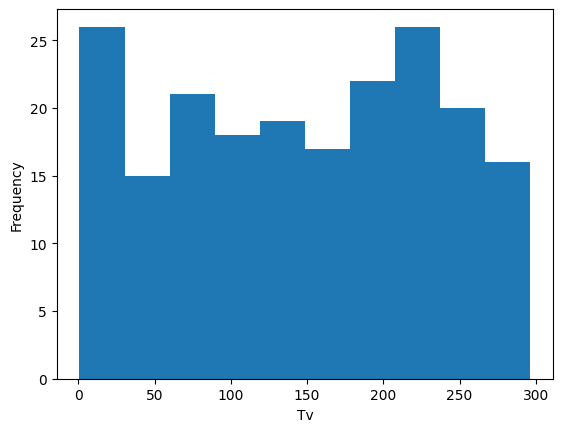

In [ ]:
sale['TV'].plot.hist(bins=10)
plt.xlabel('Tv')

Text(0.5, 0, 'Radio')

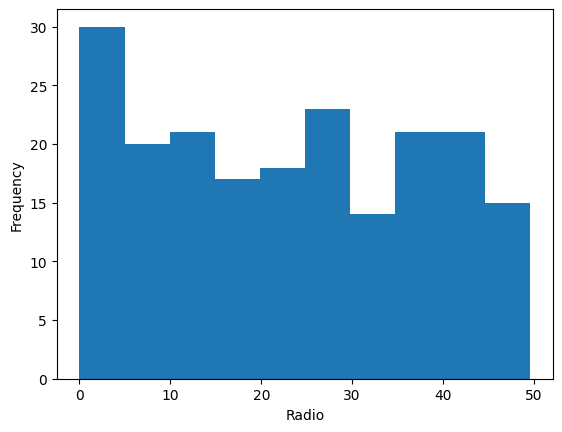

In [ ]:
sale['Radio'].plot.hist(bins=10)
plt.xlabel('Radio')

Text(0.5, 0, 'Newspaper')

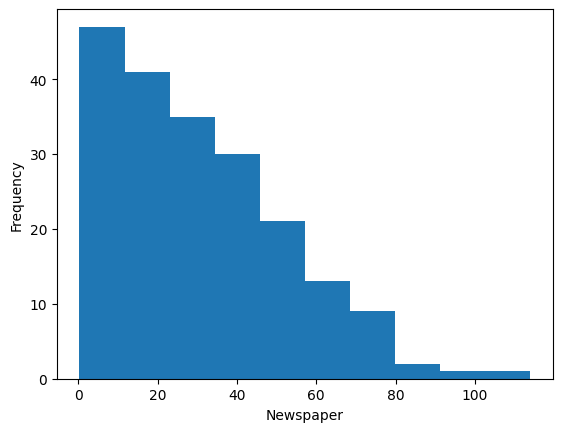

In [ ]:
sale['Newspaper'].plot.hist(bins=10)
plt.xlabel('Newspaper')

<Axes: >

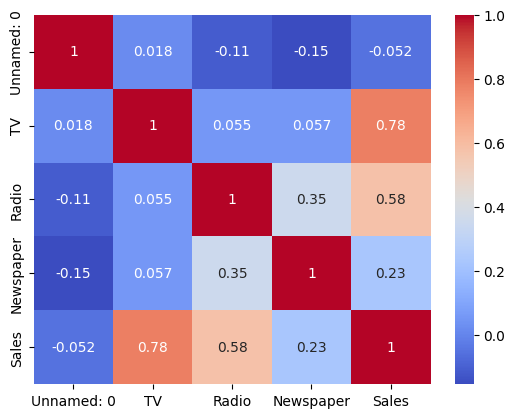

In [6]:
corr=sale.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

Sales is highly correlated with the TV

splitting the data and target

In [7]:
x=sale.drop(['Sales'],axis=1)

In [8]:
print(x)

     Unnamed: 0     TV  Radio  Newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]


In [9]:
y=sale['Sales']

In [10]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [11]:
#splitting the training and test data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [12]:
print(X_train)

     Unnamed: 0     TV  Radio  Newspaper
79           80  116.0    7.7       23.1
197         198  177.0    9.3        6.4
38           39   43.1   26.7       35.1
24           25   62.3   12.6       18.3
122         123  224.0    2.4       15.6
..          ...    ...    ...        ...
106         107   25.0   11.0       29.7
14           15  204.1   32.9       46.0
92           93  217.7   33.5       59.0
179         180  165.6   10.0       17.6
102         103  280.2   10.1       21.4

[160 rows x 4 columns]


In [13]:
print(X_test)

     Unnamed: 0     TV  Radio  Newspaper
95           96  163.3   31.6       52.9
15           16  195.4   47.7       52.9
30           31  292.9   28.3       43.2
158         159   11.7   36.9       45.2
128         129  220.3   49.0        3.2
115         116   75.1   35.0       52.7
69           70  216.8   43.9       27.2
170         171   50.0   11.6       18.4
174         175  222.4    3.4       13.1
45           46  175.1   22.5       31.5
66           67   31.5   24.6        2.2
182         183   56.2    5.7       29.7
165         166  234.5    3.4       84.8
78           79    5.4   29.9        9.4
186         187  139.5    2.1       26.6
177         178  170.2    7.8       35.2
56           57    7.3   28.1       41.4
152         153  197.6   23.3       14.2
82           83   75.3   20.3       32.5
68           69  237.4   27.5       11.0
124         125  229.5   32.3       74.2
16           17   67.8   36.6      114.0
148         149   38.0   40.3       11.9
93           94 

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train)
print(X_test)

[[-3.39167429e-01 -4.04248386e-01 -1.02823707e+00 -3.37675384e-01]
 [ 1.65444436e+00  3.20607716e-01 -9.19827737e-01 -1.16143931e+00]
 [-1.03186305e+00 -1.27051084e+00  2.59123702e-01  2.54250789e-01]
 [-1.26839326e+00 -1.04235941e+00 -6.96233499e-01 -5.74445854e-01]
 [ 3.87318222e-01  8.79103401e-01 -1.38734296e+00 -7.07629243e-01]
 [ 1.62065433e+00 -1.32873699e+00 -1.29926038e+00 -7.96418169e-01]
 [-1.18391819e+00 -9.43731452e-01 -4.65863678e-01  5.35415722e-01]
 [-1.35286834e+00 -3.23140256e-02  6.94073782e-02 -5.34984109e-01]
 [ 7.42113539e-01 -5.39713297e-01 -1.16374872e+00  2.19721762e-01]
 [-2.20902323e-01 -8.75998996e-01  3.13328366e-01 -6.87898371e-01]
 [ 2.52158101e-01 -8.53421511e-01  1.62101588e+00  2.24654481e-01]
 [ 1.24896399e+00  2.18414888e-01 -1.06889056e+00 -8.45745350e-01]
 [-1.58939855e+00 -1.67928215e+00  1.76330312e+00  2.22240532e+00]
 [ 4.54898282e-01 -1.68997675e+00  1.08574483e+00  1.01882210e+00]
 [ 3.02843146e-01 -8.74810708e-01 -1.49575229e+00 -7.47090988e

In [18]:
# loading the linear regression model
lin_reg= LinearRegression()

In [20]:
lin_reg.fit(X_train,Y_train)


LinearRegression()

In [21]:
# prediction on Training data
training_data_prediction = lin_reg.predict(X_train)

In [22]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8957553000540606


In [23]:
# prediction on Testing data
test_data_prediction = lin_reg.predict(X_test)

In [26]:
print(test_data_prediction)

[16.58515612 20.8788295  21.29375422 11.29314578 22.12768617 13.56318805
 21.03855085  8.09544754 13.72987438 15.2852231   9.64573083  7.28350237
 14.39348242  9.57719269 10.0740422  12.4336695   9.3770842  16.41119041
 10.74646786 18.78592228 19.54417199 13.62784431 12.94071862 21.19484747
  8.33756191  6.36838486 20.75893292 12.26249447  9.66626314  9.21936859
 12.53547267 10.44957934 21.38913086 12.82467382 18.16253034 20.10650807
 14.60728537 20.72400843 11.44022396  5.22085836]


In [27]:
print(Y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


In [24]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8854876091314942


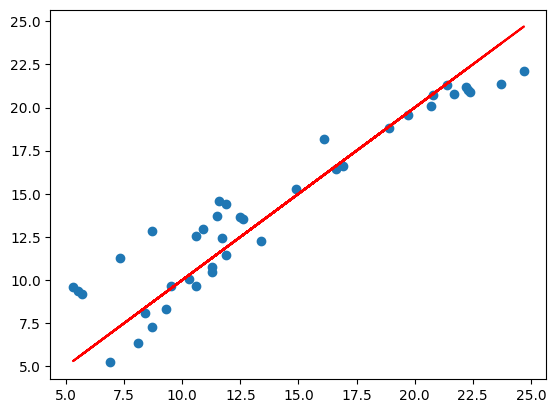

In [30]:
#visualize the prediction
plt.scatter(Y_test,test_data_prediction)
plt.plot(Y_test,Y_test,"r")
plt.show()